In [ ]:
%ls -la

In [ ]:
%pwd

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS  # package used to generate word clouds
from PIL import Image
%matplotlib inline


In [2]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [3]:


# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="narendramodi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

उनको चौकीदार से डर लगने लगा है।

चोरों की नींद हराम हो गई है कि चौकीदार सोने को तैयार नहीं है।

चौकीदार चोरों को छो… https://t.co/xCPTw1zDiK

Congress is a master at misleading farmers. 

Their fake promises and tokenism will not cut ice with the hardworkin… https://t.co/wlISXQgLlr

Know how the emphasis on next-generation infrastructure will have a positive impact on the people of Himachal Prade… https://t.co/Dc0Jz3WXkI

हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। 

अटल जी ने हिमाचल के विकास की मजबूत नींव रखी और उसी से प्रेरित होकर भाज… https://t.co/4zKhRVPJTG

Here are pictures from the public meeting in Dharamshala. 

I congratulate the Himachal Pradesh Government under CM… https://t.co/5vupo9ub1C



In [4]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,उनको चौकीदार से डर लगने लगा है।\n\nचोरों की नी...
1,Congress is a master at misleading farmers. \n...
2,Know how the emphasis on next-generation infra...
3,हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। \n\n...
4,Here are pictures from the public meeting in D...
5,देवभूमि हिमाचल के धर्मशाला में जनसभा को संबोधि...
6,Looking forward to being in Devbhoomi Himachal...
7,Assamese is a great language and the culture o...
8,"Connectivity will lead to more opportunity, wh..."
9,Absolutely! More bright engineers who will con...


In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1078290326119342082
2018-12-27 14:03:42
Twitter Media Studio
19674
5818
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xCPTw1zDiK', 'expanded_url': 'https://twitter.com/i/web/status/1078290326119342082', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [7]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,उनको चौकीदार से डर लगने लगा है।\n\nचोरों की नी...,140,1078290326119342082,2018-12-27 14:03:42,Twitter Media Studio,19674,5818
1,Congress is a master at misleading farmers. \n...,140,1078290217440665604,2018-12-27 14:03:16,Twitter Media Studio,6081,1826
2,Know how the emphasis on next-generation infra...,140,1078290099056459776,2018-12-27 14:02:47,Twitter Media Studio,4078,1127
3,हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। \n\n...,139,1078290034808115200,2018-12-27 14:02:32,Twitter Media Studio,6726,1553
4,Here are pictures from the public meeting in D...,140,1078289676031512577,2018-12-27 14:01:07,Twitter Web Client,4286,1149
5,देवभूमि हिमाचल के धर्मशाला में जनसभा को संबोधि...,98,1078195581493768193,2018-12-27 07:47:13,Periscope,15081,3369
6,Looking forward to being in Devbhoomi Himachal...,140,1077959410067144704,2018-12-26 16:08:45,Twitter for iPhone,15784,2858
7,Assamese is a great language and the culture o...,89,1077959056860594176,2018-12-26 16:07:21,Twitter for iPhone,15346,2714
8,"Connectivity will lead to more opportunity, wh...",98,1077958857467543552,2018-12-26 16:06:33,Twitter for iPhone,5729,1214
9,Absolutely! More bright engineers who will con...,98,1077958697861681152,2018-12-26 16:05:55,Twitter for iPhone,5605,1062


In [8]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 128.425


In [9]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
We accept the people’s mandate with humility. 

I thank the people of Chhattisgarh, Madhya Pradesh and Rajasthan fo… https://t.co/ujNyIJitxR
Number of likes: 93367
140 characters.

The tweet with more retweets is: 
We accept the people’s mandate with humility. 

I thank the people of Chhattisgarh, Madhya Pradesh and Rajasthan fo… https://t.co/ujNyIJitxR
Number of retweets: 16966
140 characters.



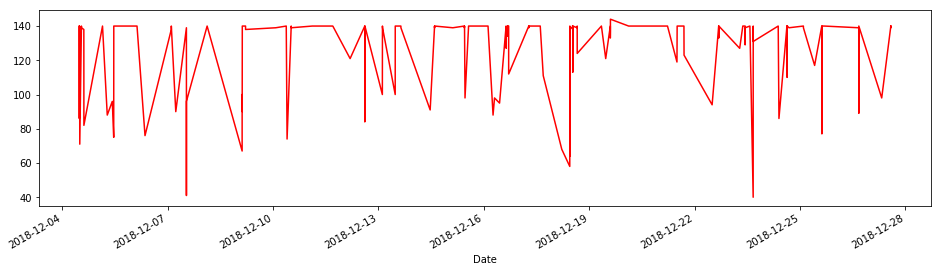

In [10]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

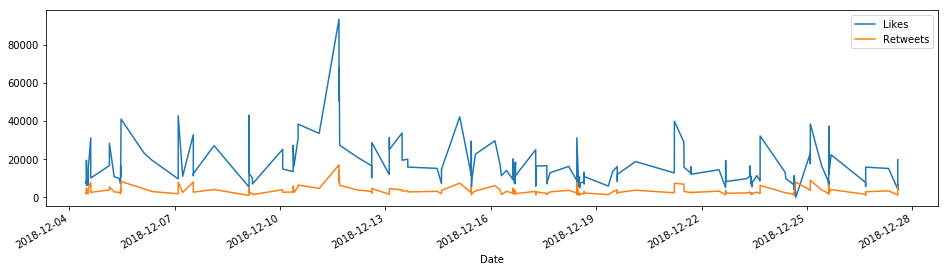

In [11]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

Text(0,0.5,'Number of tweets')

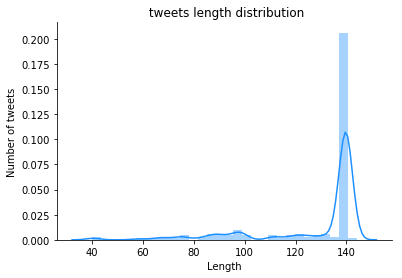

In [12]:
sns.distplot(data['len'], color="dodgerblue", bins=30)
plt.title(" tweets length distribution")
plt.xlabel("Length")
sns.despine()
plt.ylabel("Number of tweets")

In [13]:
# We print the most recent 5 tweets:
english=[]
hindi=[]
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    if tweet.lang=="hi":
        hindi.append(tweet)
    if tweet.lang=="en":
        english.append(tweet)
for x in hindi:
    print(x.text)
for x in english:
    print(x.text)
    

5 recent tweets:

उनको चौकीदार से डर लगने लगा है।

चोरों की नींद हराम हो गई है कि चौकीदार सोने को तैयार नहीं है।

चौकीदार चोरों को छो… https://t.co/xCPTw1zDiK
हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। 

अटल जी ने हिमाचल के विकास की मजबूत नींव रखी और उसी से प्रेरित होकर भाज… https://t.co/4zKhRVPJTG
Congress is a master at misleading farmers. 

Their fake promises and tokenism will not cut ice with the hardworkin… https://t.co/wlISXQgLlr
Know how the emphasis on next-generation infrastructure will have a positive impact on the people of Himachal Prade… https://t.co/Dc0Jz3WXkI
Here are pictures from the public meeting in Dharamshala. 

I congratulate the Himachal Pradesh Government under CM… https://t.co/5vupo9ub1C


In [14]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Media Studio
* Twitter Web Client
* Periscope
* Twitter for iPhone
* Twitter for Android


In [15]:
str=''
for x in english:
    str+=''.join(x.text)
print(str)

Congress is a master at misleading farmers. 

Their fake promises and tokenism will not cut ice with the hardworkin… https://t.co/wlISXQgLlrKnow how the emphasis on next-generation infrastructure will have a positive impact on the people of Himachal Prade… https://t.co/Dc0Jz3WXkIHere are pictures from the public meeting in Dharamshala. 

I congratulate the Himachal Pradesh Government under CM… https://t.co/5vupo9ub1C


In [16]:
def show_words_cloud(text):
    twitter_mask = np.array(Image.open("twitter_logo_mask.png"))

    wcloud = WordCloud(background_color="white", max_words=200,mask=twitter_mask, max_font_size=60,stopwords=STOPWORDS.add("RT"))

    wcloud.generate(text)

    plt.figure()
    plt.imshow(wcloud)
    plt.axis("off")
    plt.show()

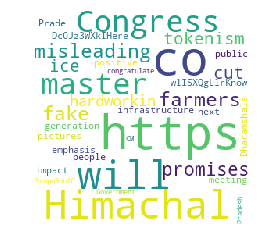

In [17]:
show_words_cloud(str)

In [18]:
eng = pd.DataFrame(data=[tweet.text for tweet in english], columns=['Tweets'])
eng['len']  = np.array([len(tweet.text) for tweet in english])
display(eng.head(10))

,Tweets,len
0,Congress is a master at misleading farmers. \n...,140
1,Know how the emphasis on next-generation infra...,140
2,Here are pictures from the public meeting in D...,140


In [19]:
hin = pd.DataFrame(data=[tweet.text for tweet in hindi], columns=['Tweets'])
hin['len']  = np.array([len(tweet.text) for tweet in hindi])
display(hin.head(10))

,Tweets,len
0,उनको चौकीदार से डर लगने लगा है।\n\nचोरों की नी...,140
1,हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। \n\n...,139


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Text(0,0.5,'Number of tweets')

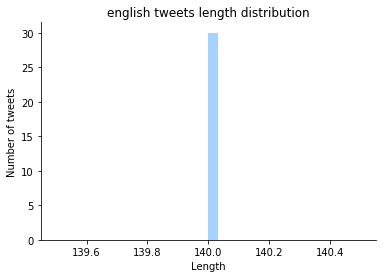

In [20]:
sns.distplot(eng['len'], color="dodgerblue", bins=30)
plt.title("english tweets length distribution")
plt.xlabel("Length")
sns.despine()
plt.ylabel("Number of tweets")

Text(0,0.5,'Number of tweets')

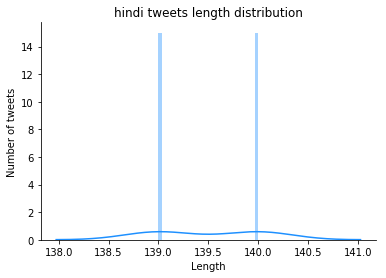

In [21]:
sns.distplot(hin['len'], color="dodgerblue", bins=30)
plt.title("hindi tweets length distribution")
plt.xlabel("Length")
sns.despine()
plt.ylabel("Number of tweets")

In [22]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Media Studio
* Twitter Web Client
* Periscope
* Twitter for iPhone
* Twitter for Android


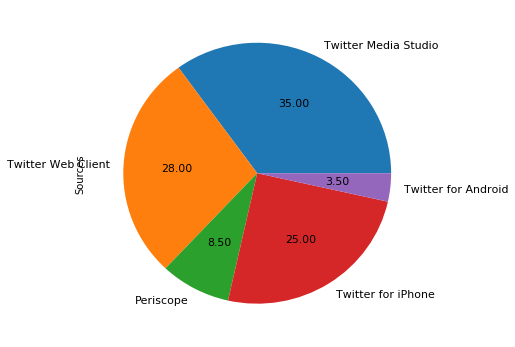

In [23]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [24]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,उनको चौकीदार से डर लगने लगा है।\n\nचोरों की नी...,140,1078290326119342082,2018-12-27 14:03:42,Twitter Media Studio,19674,5818,0
1,Congress is a master at misleading farmers. \n...,140,1078290217440665604,2018-12-27 14:03:16,Twitter Media Studio,6081,1826,-1
2,Know how the emphasis on next-generation infra...,140,1078290099056459776,2018-12-27 14:02:47,Twitter Media Studio,4078,1127,1
3,हिमाचल प्रदेश और अटल जी का नाता अटूट रहा। \n\n...,139,1078290034808115200,2018-12-27 14:02:32,Twitter Media Studio,6726,1553,0
4,Here are pictures from the public meeting in D...,140,1078289676031512577,2018-12-27 14:01:07,Twitter Web Client,4286,1149,0
5,देवभूमि हिमाचल के धर्मशाला में जनसभा को संबोधि...,98,1078195581493768193,2018-12-27 07:47:13,Periscope,15081,3369,0
6,Looking forward to being in Devbhoomi Himachal...,140,1077959410067144704,2018-12-26 16:08:45,Twitter for iPhone,15784,2858,0
7,Assamese is a great language and the culture o...,89,1077959056860594176,2018-12-26 16:07:21,Twitter for iPhone,15346,2714,1
8,"Connectivity will lead to more opportunity, wh...",98,1077958857467543552,2018-12-26 16:06:33,Twitter for iPhone,5729,1214,1
9,Absolutely! More bright engineers who will con...,98,1077958697861681152,2018-12-26 16:05:55,Twitter for iPhone,5605,1062,1


In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 47.5%
Percentage of neutral tweets: 47.5%
Percentage of negative tweets: 5.0%
